# **Step:1 Import Libraries:**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# import libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# **Step:2 EDA:**

In [ ]:
df = pd.read_csv('/content/ai_job_dataset (1).csv')
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


 Irrelevant / Redundant Columns (drop)
These don’t add predictive value or duplicate info:

- job_id (not useful)
- salary_currency (All converted to USD already)
- posting_date (They are not directly related to the target variable)
- application_deadline (They are not directly related to the target variable)
- job_description_length (not useful)
- company_name (Usually not useful)



In [ ]:
# drop irrelevent columns:
df.drop(['job_id', 'salary_currency', 'posting_date', 'application_deadline', 'job_description_length', 'company_name'], axis=1, inplace=True)
df

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,benefits_score
0,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,5.9
1,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,5.2
2,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,9.4
3,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,8.6
4,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Robotics Engineer,38604,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,7.9
14996,Machine Learning Researcher,57811,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,8.2
14997,NLP Engineer,189490,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,7.4
14998,Head of AI,79461,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,5.6


### Column Details
| Column Name |	Description	Example | Values |
| ----------- | ------------------- | ------ |

- job_title |	Title/role advertised	AI Research Scientist, Data Analyst
- salary_usd | Annual salary converted to USD	|90376, 124355
- experience_level|	Level of experience required (EN=Entry, MI=Mid, SE=Senior, EX=Executive)|	SE, EN, MI, EX
- employment_type |	Contract type (CT=Contract, FT=Full-time, PT=Part-time, FL=Freelance) |	FT, PT, CT, FL
- company_location |	Country where the company is based |	China, Canada, Germany
- company_size |	Company size (S=Small, M=Medium, L=Large) |	S, M, L
- employee_residence |	Country of employee residence |	China, Ireland, Singapore
- remote_ratio |	% of remote work allowed (0=Onsite, 50=Hybrid, 100=Remote) |	0, 50, 100
- required_skills |	Key technical skills required (comma-separated) |	Python, SQL, Tableau, Docker
- education_required |	Minimum education level required |	Bachelor, Master, PhD, Associate
- years_experience |	Minimum years of experience required |	0, 4, 9, 15
- industry |	Industry  sector of the job	Automotive, Media, Healthcare
- benefits_score |	Numeric score (0-10) reflecting benefits quality |	5.9, 9.4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           15000 non-null  object 
 1   salary_usd          15000 non-null  int64  
 2   experience_level    15000 non-null  object 
 3   employment_type     15000 non-null  object 
 4   company_location    15000 non-null  object 
 5   company_size        15000 non-null  object 
 6   employee_residence  15000 non-null  object 
 7   remote_ratio        15000 non-null  int64  
 8   required_skills     15000 non-null  object 
 9   education_required  15000 non-null  object 
 10  years_experience    15000 non-null  int64  
 11  industry            15000 non-null  object 
 12  benefits_score      15000 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.5+ MB



---

###  Categorical vs. Numerical Columns

| Column Name              | Type         |
|--------------------------|--------------|
| `job_title`              | Categorical  |
| `salary_usd`             | Numerical    |
| `experience_level`       | Categorical  |
| `employment_type`        | Categorical  |
| `company_location`       | Categorical  |
| `company_size`           | Categorical  |
| `employee_residence`     | Categorical  |
| `remote_ratio`           | Numerical    |  
| `required_skills`        | Categorical  |
| `education_required`     | Categorical  |
| `years_experience`       | Numerical    |
| `industry`               | Categorical  |
| `benefits_score`         | Numerical    |

---
- Total columns: 13
- Total rows: 15000
- 9 colums categorical
- 4 columns numerical
###  Target Column

- salary_usd

---

# **Step:3 Handle Missing Values:**

In [ ]:
# check missing values:
df.isnull().sum()

,0
job_title,0
salary_usd,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0
required_skills,0
education_required,0


There is no missing values

# **Step:4 Inconsistency check:**

In [ ]:
# handle data inconsistency:
df.duplicated().sum()

np.int64(0)

There is no duplicates.

In [ ]:
# check catagorical columns
cat_col = df.select_dtypes(include=['object']).columns.tolist()
df[cat_col]

,job_title,experience_level,employment_type,company_location,company_size,employee_residence,required_skills,education_required,industry
0,AI Research Scientist,SE,CT,China,M,China,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,Automotive
1,AI Software Engineer,EN,CT,Canada,M,Ireland,"Deep Learning, AWS, Mathematics, Python, Docker",Master,Media
2,AI Specialist,MI,FL,Switzerland,L,South Korea,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,Education
3,NLP Engineer,SE,FL,India,M,India,"Scala, SQL, Linux, Python",PhD,Consulting
4,AI Consultant,EN,PT,France,S,Singapore,"MLOps, Java, Tableau, Python",Master,Media
...,...,...,...,...,...,...,...,...,...
14995,Robotics Engineer,EN,FL,Finland,S,Finland,"Java, Kubernetes, Azure",Bachelor,Energy
14996,Machine Learning Researcher,EN,CT,United Kingdom,M,United Kingdom,"Mathematics, Docker, SQL, Deep Learning",Master,Government
14997,NLP Engineer,EX,CT,South Korea,L,South Korea,"Scala, Spark, NLP",Associate,Manufacturing
14998,Head of AI,EN,FT,Netherlands,M,Netherlands,"Java, Computer Vision, Python, TensorFlow",PhD,Real Estate


In [ ]:
for col in cat_col:
    print(f"\n{col}: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")


job_title: ['AI Research Scientist' 'AI Software Engineer' 'AI Specialist'
 'NLP Engineer' 'AI Consultant' 'AI Architect' 'Principal Data Scientist'
 'Data Analyst' 'Autonomous Systems Engineer' 'AI Product Manager'
 'Machine Learning Engineer' 'Data Engineer' 'Research Scientist'
 'ML Ops Engineer' 'Robotics Engineer' 'Head of AI'
 'Deep Learning Engineer' 'Data Scientist' 'Machine Learning Researcher'
 'Computer Vision Engineer']
Number of unique values: 20

experience_level: ['SE' 'EN' 'MI' 'EX']
Number of unique values: 4

employment_type: ['CT' 'FL' 'PT' 'FT']
Number of unique values: 4

company_location: ['China' 'Canada' 'Switzerland' 'India' 'France' 'Germany'
 'United Kingdom' 'Singapore' 'Austria' 'Sweden' 'South Korea' 'Norway'
 'Netherlands' 'United States' 'Israel' 'Australia' 'Ireland' 'Denmark'
 'Finland' 'Japan']
Number of unique values: 20

company_size: ['M' 'L' 'S']
Number of unique values: 3

employee_residence: ['China' 'Ireland' 'South Korea' 'India' 'Singapore' 

In [ ]:
# Fill missing numeric with median, categorical with mode
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [ ]:
# Drop columns with too many missing values (if >40%)
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [ ]:
# check numerical columns

num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_col]

,salary_usd,remote_ratio,years_experience,benefits_score
0,90376,50,9,5.9
1,61895,100,1,5.2
2,152626,0,2,9.4
3,80215,50,7,8.6
4,54624,100,0,6.6
...,...,...,...,...
14995,38604,50,1,7.9
14996,57811,0,0,8.2
14997,189490,50,17,7.4
14998,79461,0,1,5.6


In [ ]:
# check numeric value inconsistency unique value
for col in num_col:
    print(f"\n{col}: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")



salary_usd: [ 90376  61895 152626 ... 189490  79461  56481]
Number of unique values: 14315

remote_ratio: [ 50 100   0]
Number of unique values: 3

years_experience: [ 9  1  2  7  0  3  5  8 15  6  4 16 10 18 12 19 17 13 11 14]
Number of unique values: 20

benefits_score: [ 5.9  5.2  9.4  8.6  6.6  6.3  7.6  9.3  5.8  9.9  6.8  9.1  9.8  9.6
  8.7  6.7 10.   6.9  7.4  8.8  7.7  6.   9.2  5.3  5.7  7.9  6.1  8.1
  8.   5.1  7.5  5.5  5.4  9.7  7.2  5.6  9.   6.2  6.5  7.1  9.5  7.
  8.2  8.4  7.8  6.4  8.3  8.9  7.3  8.5  5. ]
Number of unique values: 51


In [ ]:
df[['salary_usd', 'remote_ratio']].describe()

,salary_usd,remote_ratio
count,15000.000000,15000.000000
mean,115348.965133,49.483333
std,60260.940438,40.812712
min,32519.000000,0.000000
25%,70179.750000,0.000000
50%,99705.000000,50.000000
75%,146408.500000,100.000000
max,399095.000000,100.000000


In [ ]:
df['years_experience'].describe()

,years_experience
count,15000.000000
mean,6.253200
std,5.545768
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,19.000000


In [ ]:
df['benefits_score'].describe()

,benefits_score
count,15000.000000
mean,7.504273
std,1.450870
min,5.000000
25%,6.200000
50%,7.500000
75%,8.800000
max,10.000000


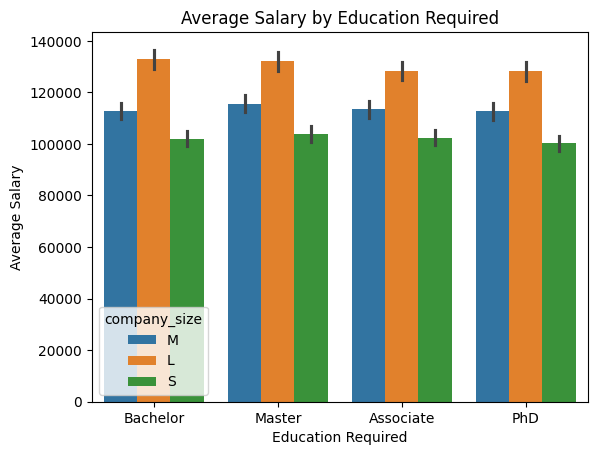

In [ ]:
# Bar plots for viualization:
sns.barplot(x='education_required', y='salary_usd', data=df, hue='company_size')
plt.title('Average Salary by Education Required')
plt.xlabel('Education Required')
plt.ylabel('Average Salary')
plt.show()



# **Step:4 Distribution of Target column:**

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3783102312.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-3783102312.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary_usd'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

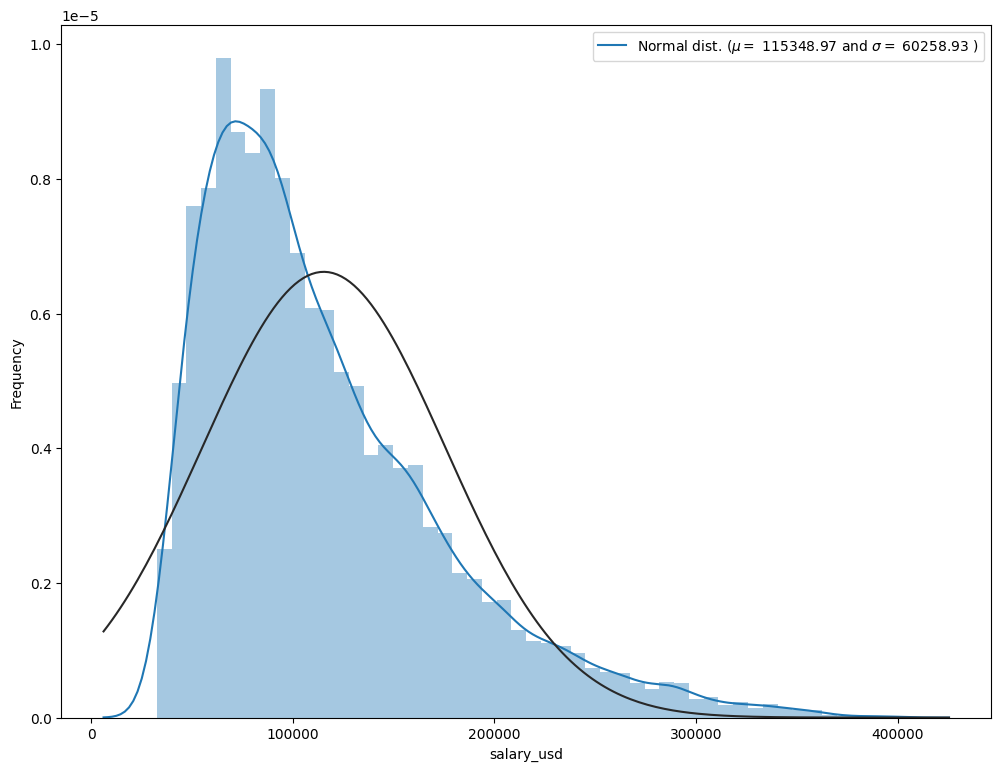

In [ ]:
from scipy import stats

plt.subplots(figsize=(12,9))
sns.distplot(df['salary_usd'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(df['salary_usd'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [ ]:
# check skewness or kurtosis
print(f"Skewness: {df['salary_usd'].skew()}")
print(f"Kurtosis: {df['salary_usd'].kurt()}")

Skewness: 1.2527592133197596
Kurtosis: 1.56922226950801


- Skewness: It is right skeswed, we need to transformed it to normal distribution.

In [ ]:
df['salary_usd']

,salary_usd
0,90376
1,61895
2,152626
3,80215
4,54624
...,...
14995,38604
14996,57811
14997,189490
14998,79461


<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1473011204.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-1473011204.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary_usd'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

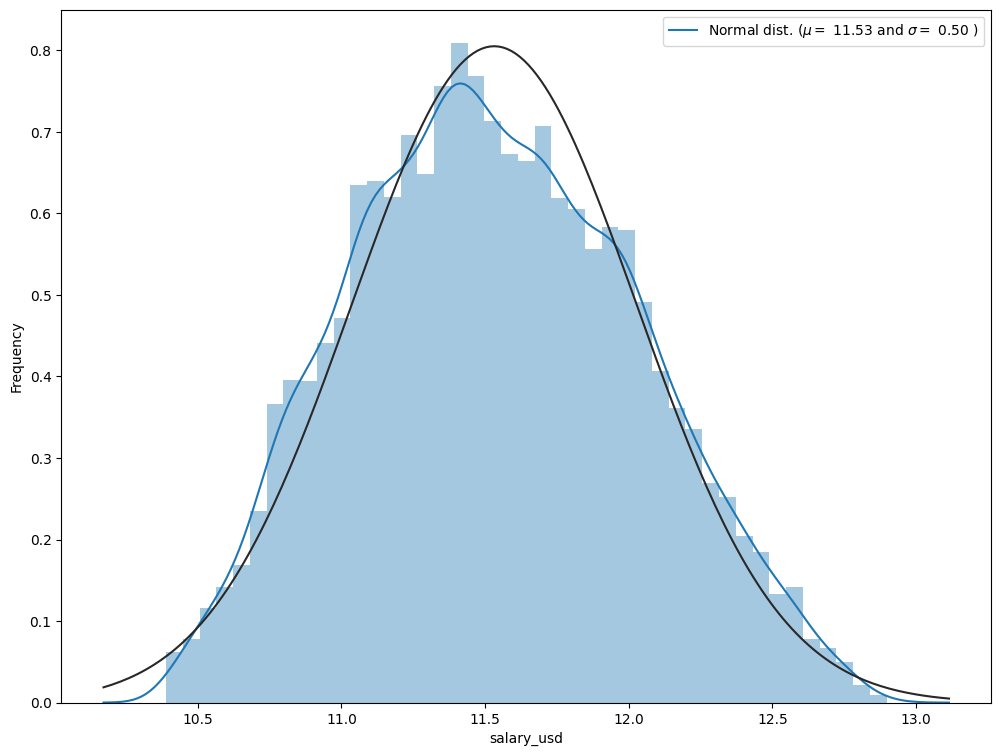

In [ ]:
#we use log function which is in numpy
df['salary_usd'] = np.log1p(df['salary_usd'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(df['salary_usd'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['salary_usd'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [ ]:
df['salary_usd']

,salary_usd
0,11.411745
1,11.033211
2,11.935752
3,11.292478
4,10.908247
...,...
14995,10.561137
14996,10.964952
14997,12.152097
14998,11.283034


# **Step:5 Label Encoding:**

In [ ]:
# Extracting categorical columns:
catFeatures= [col for col in df.columns if col in
              df.select_dtypes(include=object).columns]

from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Data
labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    df[col] = labelEncode.fit_transform(df[col])

# **Step: 6 Correlation Analysis:**

In [ ]:
# Correlation matrix for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()

<Axes: >

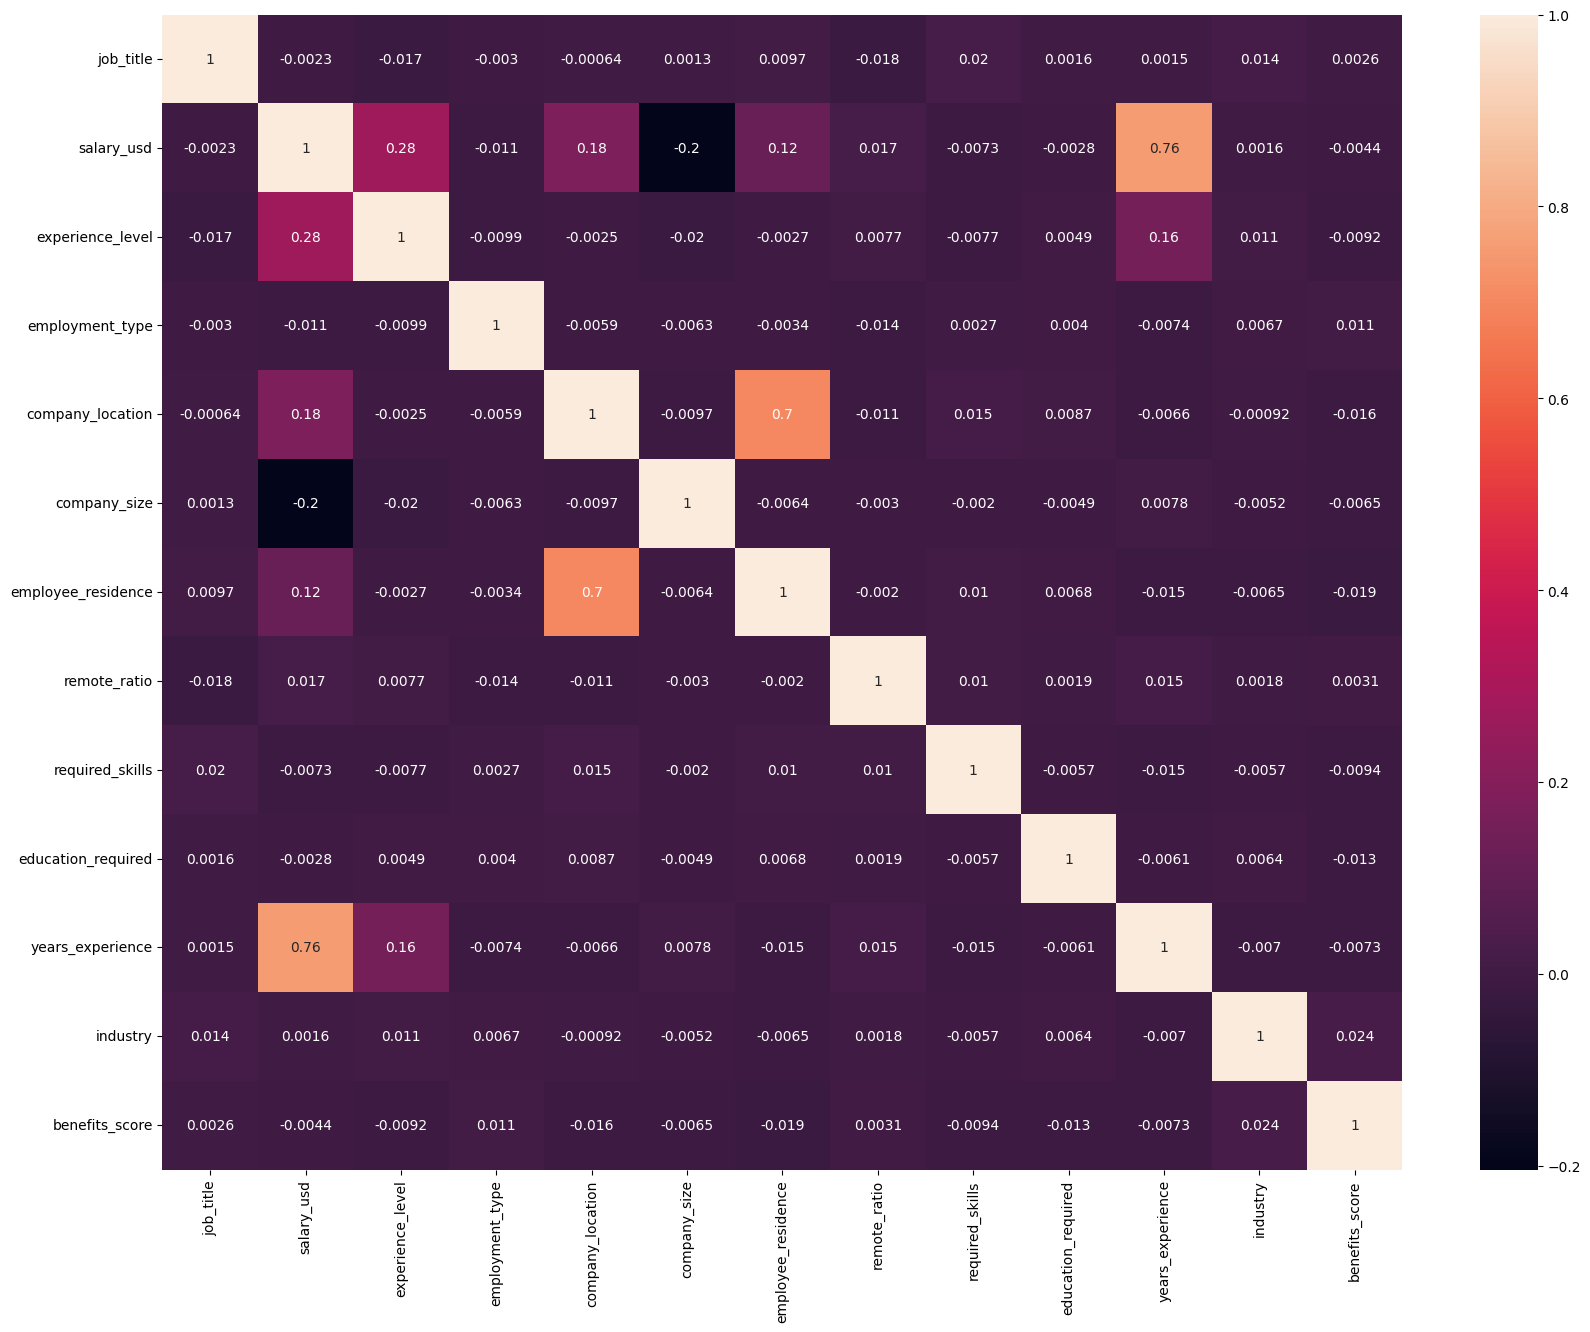

In [ ]:
#Coralation plot
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

-  years_experience (0.76) Strong positive correlation as years of experience increase, salary tends to increase
- experience_level (0.28) Moderate positive correlation higher experience levels are linked with higher salaries
- company_locatio (0.18) Weak positive correlation – location of the company slightly affects salary.
- employee_residence (0.12) Weak positive correlation – where an employee lives has a small effect on salary.

# **Step:7 Train & Test split:**

In [ ]:
# split the data
X = df.drop('salary_usd', axis=1)
y = df['salary_usd']
# train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (12000, 12)
Test set: (3000, 12)


# **Step:8 Modeling:**
### **Linear Regression:**

In [ ]:
# linear regression model
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()
l_model.fit(X_train, y_train)
print("Predict value " + str(l_model.predict(X_test.iloc[[0]])))
print("Real value " + str(y_test.iloc[0]))
print("Accuracy --> ", l_model.score(X_test, y_test)*100)



Predict value [11.61510947]
Real value 11.84165350685801
Accuracy -->  67.70100559324395


In [ ]:
# Matrices apply on Linear Regression Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = l_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.07939529132806103
Mean Absolute Error: 0.23006511352516446
Root Mean Squared Error: 0.2817717007225194
R-squared: 0.6770100559324395


### **Random Forest:**

In [ ]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)
#Fit
rf_model.fit(X_train, y_train)

#Prediction
print("Predict value " + str(rf_model.predict(X_test.iloc[[0]])))
print("Real value " + str(y_test.iloc[0]))

#Score/Accuracy
print("Accuracy --> ", rf_model.score(X_test, y_test)*100)



Predict value [11.8713504]
Real value 11.84165350685801
Accuracy -->  90.82571717011206


In [ ]:
# Matrices apply on Random Forest Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rf_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.022551626494372257
Mean Absolute Error: 0.12580236857926336
Root Mean Squared Error: 0.15017198971303622
R-squared: 0.9082571717011206


### **Decision Tree:**

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
print("Predict value " + str(dt_model.predict(X_test.iloc[[0]])))
print("Real value " + str(y_test.iloc[0]))
print("Accuracy --> ", dt_model.score(X_test, y_test)*100)



Predict value [11.79431528]
Real value 11.84165350685801
Accuracy -->  82.97653533868217


In [ ]:
# Matrices apply on Decision Tree Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = dt_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.04184597573463674
Mean Absolute Error: 0.16337350258211544
Root Mean Squared Error: 0.20456288943656603
R-squared: 0.8297653533868217


### **Suport Vector Machine:**

In [ ]:
# Suport Vector Machine
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
print("Predict value " + str(svr_model.predict(X_test.iloc[[0]])))
print("Real value " + str(y_test.iloc[0]))
print("Accuracy --> ", svr_model.score(X_test, y_test)*100)



Predict value [11.52201781]
Real value 11.84165350685801
Accuracy -->  1.5581452137052754


In [ ]:
# Matrices apply on Support Vector Regressor Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = svr_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.2419833769808541
Mean Absolute Error: 0.4038698782589198
Root Mean Squared Error: 0.49191805921398546
R-squared: 0.015581452137052754


### **Gradient Boosting:**

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
print("Predict value " + str(gb_model.predict(X_test.iloc[[0]])))
print("Real value " + str(y_test.iloc[0]))
print("Accuracy --> ", gb_model.score(X_test, y_test)*100)



Predict value [11.85822744]
Real value 11.84165350685801
Accuracy -->  91.39267366042768


In [ ]:
# Matrices apply on Gradient Boosting Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = gb_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.02115797085444537
Mean Absolute Error: 0.1229002413848996
Root Mean Squared Error: 0.1454577975030743
R-squared: 0.9139267366042767


# **Step:9 Matrics:**

- MAE (Mean Absolute Error)
- MSE (Mean Square Error) Error ko zyada show karega
- RMSE   Error ko square root kar dega
- R² (Model Variance / taget k characteistics ko dekhta hy)
  - R1 -> 1 (close to 1 is best model)
  - RMSE (close to 0 is best)
- root square and Mean square error ko dekh k model select karte hen



### Gadient Boosting Regressor / Combination of Decision Tree
- Random forest me sub trees aik dosre se apni leaning share nahi karte
- Gradient Boosting me trees aik dosre ko learning shae karte hen is ley iski accuracy sub se achi ati hy.


**Conclusion**:


- Best Performing Model: The **Gradient Boosting model** achieved the highest accuracy of 91.39%, making it the most effective model.
- Second Best: **Random Forest Model** and  **Decision Tree model** also performed reasonably well with an accuracy of 90.79% & 83.04% respectively.

- Lowest Accuracy: The **Linear Regression** had the lowest accuracy at 67.70%, and **SVM model** accuracy at 1.55%

---

In summary, for this specific prediction task, the Gradient Boosting Model is the recommended model.


